In [5]:
# Bash əmrləri üçün ! işarəsi istifadə olunur
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Dataset-i endirmək
!kaggle datasets download -d marquis03/plants-classification


Dataset URL: https://www.kaggle.com/datasets/marquis03/plants-classification
License(s): apache-2.0
 98% 1.32G/1.34G [00:09<00:00, 269MB/s]
100% 1.34G/1.34G [00:11<00:00, 124MB/s]


In [6]:
import zipfile
zip_ref=zipfile.ZipFile('/content/plants-classification.zip')
zip_ref.extractall()
zip_ref.close()

In [7]:
import os
for dirpath,dirnames,filenames in os.walk('/content/train'):
  print(f'There are {len(dirnames)} directories and{len(filenames)} images in {dirpath}.')

There are 30 directories and1 images in /content/train.
There are 0 directories and700 images in /content/train/waterapple.
There are 0 directories and700 images in /content/train/coconut.
There are 0 directories and700 images in /content/train/cucumber.
There are 0 directories and700 images in /content/train/melon.
There are 0 directories and700 images in /content/train/sweetpotatoes.
There are 0 directories and700 images in /content/train/mango.
There are 0 directories and700 images in /content/train/papaya.
There are 0 directories and700 images in /content/train/paddy.
There are 0 directories and700 images in /content/train/guava.
There are 0 directories and700 images in /content/train/watermelon.
There are 0 directories and700 images in /content/train/pineapple.
There are 0 directories and700 images in /content/train/aloevera.
There are 0 directories and700 images in /content/train/bilimbi.
There are 0 directories and700 images in /content/train/cassava.
There are 0 directories and

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

def view_random_image(target_dir,target_class):
  target_folder=target_dir+target_class
  random_image=random.sample(os.listdir(target_folder),1)
  img=mpimg.imread(target_folder+'/'+ random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')
  print(f'Image shape:{img.shape}')
  return img

Image shape:(819, 1024, 3)


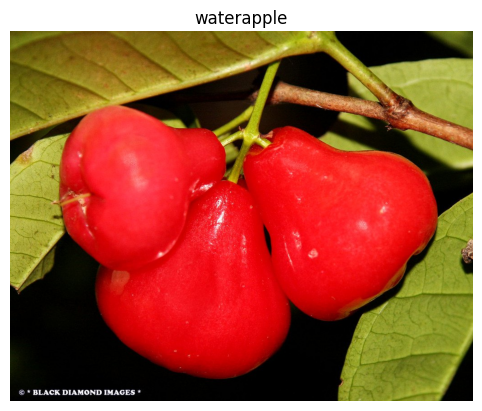

In [10]:
img=view_random_image(target_dir='/content/train/',
                      target_class='waterapple')

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen=ImageDataGenerator(rescale=1./255)
valid_datagen=ImageDataGenerator(rescale=1./255)

train_dir='/content/train'
test_dir='/content/test'

train_data=train_datagen.flow_from_directory(train_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode='sparse',
                                             seed=42)

valid_data=valid_datagen.flow_from_directory(test_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode='sparse',
                                             seed=42)

model_1=tf.keras.Sequential([
    tf.keras.layers.Input(shape = (224, 224, 3)),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           strides=1,
                           padding='same',
                           kernel_initializer='he_normal'
                           ),
    tf.keras.layers.Conv2D(10, 3, activation='relu',kernel_initializer='he_normal'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding = 'valid'),
    tf.keras.layers.Conv2D(10, 3, activation = 'relu',kernel_initializer='he_normal'),
    tf.keras.layers.Conv2D(10, 3, activation= 'relu',kernel_initializer='he_normal'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(30, activation = 'softmax')
])

model_1.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

history = model_1.fit(train_data,
                      epochs = 5,
                      validation_data = valid_data
                     )


Found 21000 images belonging to 30 classes.
Found 6000 images belonging to 30 classes.
Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


657/657 ━━━━━━━━━━━━━━━━━━━━ 89s 125ms/step - accuracy: 0.1231 - loss: 3.3254 - val_accuracy: 0.3253 - val_loss: 2.4263
Epoch 2/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 71s 109ms/step - accuracy: 0.5298 - loss: 1.7455 - val_accuracy: 0.4635 - val_loss: 2.1232
Epoch 3/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 71s 108ms/step - accuracy: 0.8386 - loss: 0.6323 - val_accuracy: 0.5095 - val_loss: 2.4107
Epoch 4/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 70s 107ms/step - accuracy: 0.9378 - loss: 0.2905 - val_accuracy: 0.5102 - val_loss: 2.6588
Epoch 5/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 70s 106ms/step - accuracy: 0.9551 - loss: 0.1974 - val_accuracy: 0.5313 - val_loss: 2.4837


In [12]:

tf.random.set_seed(42)
model_2 = tf.keras.Sequential([

    tf.keras.layers.Input(shape = (224, 224, 3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4, activation ='relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(30, activation = 'softmax')
])

model_2.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

model_2.fit(train_data,
            epochs = 5,

            validation_data = valid_data
          )

Epoch 1/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 70s 103ms/step - accuracy: 0.0312 - loss: 3.4020 - val_accuracy: 0.0333 - val_loss: 3.4012
Epoch 2/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 64s 97ms/step - accuracy: 0.0312 - loss: 3.4014 - val_accuracy: 0.0333 - val_loss: 3.4012
Epoch 3/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 65s 99ms/step - accuracy: 0.0326 - loss: 3.4014 - val_accuracy: 0.0333 - val_loss: 3.4012
Epoch 4/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 64s 98ms/step - accuracy: 0.0326 - loss: 3.4015 - val_accuracy: 0.0333 - val_loss: 3.4012
Epoch 5/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 66s 100ms/step - accuracy: 0.0322 - loss: 3.4014 - val_accuracy: 0.0333 - val_loss: 3.4012


In [13]:
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (224, 224, 3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4, activation ='relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(30, activation = 'softmax')
])

model_2.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001),
    metrics = ['accuracy']
)

model_2.fit(train_data,
            epochs = 5,

            validation_data = valid_data
          )

Epoch 1/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 67s 100ms/step - accuracy: 0.0306 - loss: 3.4023 - val_accuracy: 0.0333 - val_loss: 3.4012
Epoch 2/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 67s 102ms/step - accuracy: 0.0340 - loss: 3.4012 - val_accuracy: 0.0333 - val_loss: 3.4012
Epoch 3/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 64s 97ms/step - accuracy: 0.0333 - loss: 3.4012 - val_accuracy: 0.0333 - val_loss: 3.4012
Epoch 4/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 64s 98ms/step - accuracy: 0.0321 - loss: 3.4012 - val_accuracy: 0.0333 - val_loss: 3.4012
Epoch 5/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 65s 99ms/step - accuracy: 0.0349 - loss: 3.4012 - val_accuracy: 0.0333 - val_loss: 3.4012
